In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Logbook 5

## 4 body Hexagonal Klemperer Rosette (10/03/2023)

A series of [animations](http://burtleburtle.net/bob/physics/kempler.html) have been made to show some various Klemperer Rosettes, sadly these are written in Javascript which is unintelligible for me, but they provide a good basis for what I should expect to see.

The fifth and sixth animation is an example of the basic hexagonal Klemperer rosette, but it is also a demonstration of Lagrangian points, which are points for where the gravitational forces acting on the small bodies are in equilibrium, such that there is no net force acting on the moons. 

For this situation, we have two moons, a single smaller moon, and a star. The smaller ones are at the Lagrange points L4 and L5 of the big moon - star situation.

According to this [video](https://youtu.be/XRlQtDimEws), we can calculate the lagrangian points L4 and L5 using some basic mechanics, leading to us finding that the Lagrangian points L4 and L5 sit at the corners of equilateral triangles that are formed by m1 and m2.

The following functions `L4` and `L5` are adapted rather heavily from this video:

In [2]:
def L4(m1, m2, vr1, vr2):
    """
    Determines the Lagrangian point L4 for a two bodies, m1 and m2, in which m1>>m2. The net force acting on a body at 
    its Lagrangian point is zero, and so it would take zero energy to stay at that point. 
    Adapted from Physics Explained's video on Lagrangian points L4 and L5 linked above.
    
    Inputs:
    m1    The mass of the first body
    m2    The mass of the second body
    vr1   The vector position of mass 1
    vr2   The vector position of mass 2
    
    Outputs
    rt    The vector position of the Lagrangian point L4
    """
    # This is rewritten using numpy arrays, the previous project was written for a VPython animation
    R = np.linalg.norm(vr2-vr1)
    theta = np.pi/3 
    vR=R*np.array([np.cos(theta),np.sin(theta),0]) 
    rt=vr1+vR                                      
    
    return(rt)

def L5(m1, m2, vr1, vr2):
    """
    Determines the Lagrangian point L5 for a two bodies, m1 and m2, in which m1>>m2. The net force acting on a body at
    its Lagrangian point is zero, and so it would take zero energy to stay at that point. 
    Adapted from Physics Explained's video on Lagrangian points L4 and L5 linked above.
    
    Inputs:
    m1    The mass of the first body
    m2    The mass of the second body
    vr1   The vector position of mass 1
    vr2   The vector position of mass 2
    
    Outputs
    rt    The vector position of the Lagrangian point L5
    """

    R = np.linalg.norm(vr2-vr1)
    theta = -np.pi/3
    vR=R*np.array([np.cos(theta),np.sin(theta),0])
    rt=vr1+vR
    
    return(rt)

In [3]:
# Real-life parameters
G = 6.67e-11
m1 = 2e30 # Mass of sun
m2 = 1e25 # Mass of earth 
R = 1.5e11 # distance from Earth to Sun

r1 = m2*R/(m1+m2)
r2 = m1*R/(m1+m2)

v1 = np.sqrt(G*m2*r1/R**2)
v2 = np.sqrt(G*m1*r2/R**2)

Lagrangian4 = L4(m1, m2, np.array([-r1,0,0]), np.array([r2,0,0]))
Lagrangian5 = L5(m1, m2, np.array([-r1,0,0]), np.array([r2,0,0]))
print(f"Lagrangian points L4 and L5 are \n {Lagrangian4}\n and \n{Lagrangian5}")


Lagrangian points L4 and L5 are 
 [7.49992500e+10 1.29903811e+11 0.00000000e+00]
 and 
[ 7.49992500e+10 -1.29903811e+11  0.00000000e+00]


(-165000000000.0, 165000000000.0)

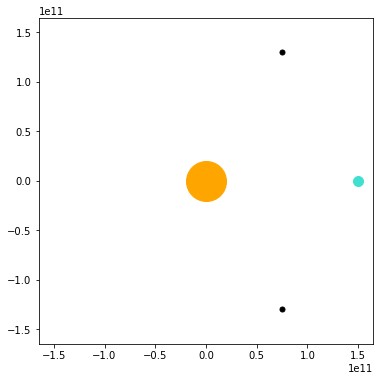

In [4]:
fig = plt.figure(figsize = (6,6))

plt.plot(Lagrangian4[0], Lagrangian4[1], 'o',  markersize = 5, label = "L4", color = "black")
plt.plot(Lagrangian5[0], Lagrangian5[1], 'o',  markersize = 5, label = "L5", color = "black")
plt.plot(-r1, 0, 'o', markersize = 40, label = "Sun", color = "orange")
plt.plot(r2, 0, 'o', markersize = 10, label = "Earth", color = "turquoise")

plt.ylim(-1.1 * R, 1.1 * R)

plt.xlim(-1.1 * R, 1.1 * R)

This is the rough location of the Lagrange Points L4 and L5 for the Earth-Sun system. 

## Propagating the orbits (10/03/2023)

So, if we were to place two objects at L4 and L5, supposedly, they should feel zero net force. Let's try and implement this using our Velocity Verlet algorithm.

## Confusion! (11/03/2023)

I have been driven almost insane by the fact that I'm getting a NaN error for the forces, so I've added a factor of $1 \times 10 ^{-9}$ to my `r_12_mag` in order for it to not be affected. Is this unphysical? Well, it's certainly less unphysical than the idea that the force of gravity is infinite if two bodies collide, so I think it's okay.

As well as this, my initial positions were very slightly different to what Burtle uses in his Klemperer Rosette, but I will assume this is due to his calculations being rounded.

My calculations of the velocity were very, very wrong for $m_3$ and $m_4$, so far I've simply copied what Burtle has written, but I will go over this in pen and paper and readjust my values. 

According to Lagrangian calculations, m3 and m4 should be at positions 
 L4: [4.98003992 8.66025404 0.        ] 
 and 
 L5: [ 4.98003992 -8.66025404  0.        ]
Burtle uses the points 
 [5.   8.66 0.  ] 
 and 
 [ 5.   -8.66  0.  ]
[-0.01996008  0.          0.        ]
[9.98003992 0.         0.        ]
[4.98003992 8.66025404 0.        ]
[ 4.98003992 -8.66025404  0.        ]


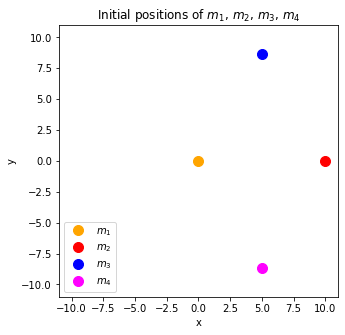

In [5]:
# Parameters

N = 480000 # number of steps

G = 1
m1 = 1000
m2 = 2
m3 = 0.000001 # readjusted value: objects at the Lagrange points should have a very low mass
m4 = 0.000001

R = 10 # Distance of m2 to m1

r1 = m2 * R/(m1+m2)
r2 = m1 * R/(m1+m2)

Ndim = 3

R1 = np.zeros((N,Ndim))
R2 = np.zeros((N,Ndim))
R3 = np.zeros((N,Ndim))
R4 = np.zeros((N,Ndim))

R1[0] = np.array([-r1,0,0])
R2[0] = np.array([r2,0,0])

Lagrangian4 = L4(m1, m2, R1[0], R2[0])
Lagrangian5 = L5(m1, m2, R1[0], R2[0])

print(f"According to Lagrangian calculations, m3 and m4 should be at positions \n L4: {Lagrangian4} \n and \n L5: {Lagrangian5}")

R3[0] = np.copy(Lagrangian4)
R4[0] = np.copy(Lagrangian5)

#R3[0] = np.array([5.0, 8.66, 0])
#R4[0] = np.array([5.0,-8.66, 0])

print(f"Burtle uses the points \n {np.array([5.0, 8.66, 0])} \n and \n {np.array([5.0,-8.66, 0])}")


plt.figure(figsize = (5,5))
plt.plot(R1[0,0], R1[0,1], 'o', color = "Orange", markersize=10, label = r"$m_1$")
plt.plot(R2[0,0], R2[0,1], 'o', color = "Red", markersize=10, label = r"$m_2$")
plt.plot(R3[0,0], R3[0,1], 'o', color = "Blue", markersize=10, label = r"$m_3$")
plt.plot(R4[0,0], R4[0,1], 'o', color = "Magenta", markersize=10, label = r"$m_4$")


plt.title(r"Initial positions of $m_1$, $m_2$, $m_3$, $m_4$")
plt.xlabel(r"x")
plt.ylabel(r"y")
plt.xlim(-1.1*R, 1.1*R)
plt.ylim(-1.1*R, 1.1*R)

plt.legend(loc = "lower left")

print(R1[0])
print(R2[0])
print(R3[0])
print(R4[0])
plt.savefig("klempinit.jpg", dpi=300)

## Working out velocities (11/03/2023)

I've now figured out the velocities.

So, one key fact is that the angular velocities of $m_1, m_2, m_3, \& \, m_4$ are the same. Since we're working with vectors here, we'll have to use the angular velocity vector. The angular speed vector, the velocity vector, and the position vector are all orthogonal to eachother at all times, therefore we can use cross products to calculate everything.

The speed $v_2$ is just the orbital velocity

$$
v_2 = \sqrt{\frac{Gm_1}{R}}
$$

The position $r_2$ is based on center of mass calculations between $r_1$ and $r_2$

$$
r_2 = \frac{m_1R}{(m_1+m_2)}
$$

Where $R=10, G = 1, m_1 = 1000$. So we have that the position and velocity vector for $m_2$ is

$$
\vec{r}_2 = \begin{pmatrix} r_2 \\0 \\0  \end{pmatrix}
$$


$$
\vec{v}_2 = \begin{pmatrix} 0 \\v_2 \\0  \end{pmatrix}
$$

From classical mechanics we have 

$$
\vec{\omega} = \frac{\vec{r}_2 \times \vec{v}_2}{r_2^2}
$$

We can recover tangential velocity via the fact that all of these vectors are orthogonal



$$
\vec{v}_2 = \vec{\omega} \times \vec{r}_2 
$$

Since $\vec{\omega}$ is the same for $m_3$ and $m_4$, we therefore have that

$$
\vec{v}_1 = \vec{\omega} \times \vec{r}_1
$$

$$
\vec{v}_3 = \vec{\omega} \times \vec{r}_3
$$

$$
\vec{v}_4 = \vec{\omega} \times \vec{r}_4
$$

From what I can see, Burtle uses a value of $G=10$ for everything, so I will follow suit.

In [6]:
V1 = np.zeros((N,Ndim)) # the star is stationary so this won't be updated
V2 = np.zeros((N,Ndim))
V3 = np.zeros((N,Ndim))
V4 = np.zeros((N,Ndim))

v2 = np.sqrt(G*m1/R**2)
V2[0] = np.array([0,v2,0])

# m1, m2, m3, m4 should have the same angular speed
# the angular velocity vector is the cross product of v2 and r2

w = np.cross(R2[0], V2[0])

print(f"w is {w}")

# Therefore the velocities v3 and v4 are the cross product of w with r3 and r4

v1 = np.cross(w, R1[0]) / np.linalg.norm(R)**2
v3 = np.cross(w, R3[0]) / np.linalg.norm(R2[0])**2
v4 = np.cross(w, R4[0]) / np.linalg.norm(R2[0])**2



print(f"v1 is {v1}") # These values 
print(f"v2 is {V2[0]}")
print(f"v3 is {v3}") # These values 
print(f"v4 is {v4}")


V1[0] = v1
V3[0] = v3
V4[0] = v4

w is [ 0.          0.         31.55965729]
v1 is [ 0.         -0.00629933  0.        ]
v2 is [0.         3.16227766 0.        ]
v3 is [-2.74409001  1.57797655  0.        ]
v4 is [ 2.74409001  1.57797655 -0.        ]


In [7]:
print(f"Initial positions are \n R1 : {R1[0]} \n R2 : {R2[0]} \n R3 : {R3[0]} \n R4 : {R4[0]}")
print(f"Initial velocities are \n V1 : {V1[0]} \n V2 : {V2[0]} \n V3 : {V3[0]} \n V4 : {V4[0]}")
print(f"Masses are \n m1 : {m1} \n m2 : {m2} \n m3 : {m3} \n m4 : {m4}")

Initial positions are 
 R1 : [-0.01996008  0.          0.        ] 
 R2 : [9.98003992 0.         0.        ] 
 R3 : [4.98003992 8.66025404 0.        ] 
 R4 : [ 4.98003992 -8.66025404  0.        ]
Initial velocities are 
 V1 : [ 0.         -0.00629933  0.        ] 
 V2 : [0.         3.16227766 0.        ] 
 V3 : [-2.74409001  1.57797655  0.        ] 
 V4 : [ 2.74409001  1.57797655 -0.        ]
Masses are 
 m1 : 1000 
 m2 : 2 
 m3 : 1e-06 
 m4 : 1e-06


In [8]:
def force(G, m1, m2, r1, r2):
    """
    Returns the force acting on m1 due to m2
    inputs:
    G     gravitational constant
    m1    mass of body 1
    m2    mass of body 2
    r1    radius of body 1
    r2    radius of body 2
    outputs:
    f     the force acting on m1 due to m2  
    """
    
    f = np.array([0,0,0])
    
    r_12 = r2 - r1
    r_12_mag = np.linalg.norm(r_12) ** 3  + 1e-9 # This little factor of 1e-9 prevents any NaN errors
    
    f = G * (m1 * m2 * r_12) / r_12_mag
    return f

Since I'll be playing around a lot with the Verlet, I thought it would be useful to make the Verlet integrator a function so I can propagate several different orbits. This integrator only works for four bodies, later I may make one for a generalised number of bodies, which shouldn't be too difficult.

In [9]:
def Verlet_4_bodies(G, m1, m2, m3, m4, R1, R2, R3, R4, V1, V2, V3, V4, dt, N):
    """
    Propagates the orbits of bodies 1, 2, 3, 4 using a velocity verlet integration.
    
    Inputs:
    G    The gravitational constant
    m1   mass of body 1
    m2   mass of body 2
    m3   mass of body 3
    m4   mass of body 4
    R1   position vector of body 1
    R2   position vector of body 2
    R3   position vector of body 3
    R4   position vector of body 4
    V1   velocity vector of body 1
    V2   velocity vector of body 2
    V3   velocity vector of body 3
    V4   velocity vector of body 4
    N    number of steps
    
    Outputs:
    R1   updated position vector of body 1
    R2   updated position vector of body 2
    R3   updated position vector of body 3
    R4   updated position vector of body 4
    V1   updated velocity vector of body 1
    V2   updated velocity vector of body 2
    V3   updated velocity vector of body 3
    V4   updated velocity vector of body 4
    """

    for i in range(N - 1):

        f1 = force(G, m1, m2, R1[i], R2[i]) + force(G, m1, m3, R1[i], R3[i]) + force(G, m1, m4, R1[i], R4[i])
        f2 = force(G, m2, m1, R2[i], R1[i]) + force(G, m2, m3, R2[i], R3[i]) + force(G, m2, m4, R2[i], R4[i])
        f3 = force(G, m3, m1, R3[i], R1[i]) + force(G, m3, m2, R3[i], R2[i]) + force(G, m3, m4, R3[i], R4[i])
        f4 = force(G, m4, m1, R4[i], R1[i]) + force(G, m4, m2, R4[i], R2[i]) + force(G, m4, m3, R4[i], R3[i])

        R1[i+1] = R1[i] + dt * V1[i] + (dt**2 * f1)/(2*m1)
        R2[i+1] = R2[i] + dt * V2[i] + (dt**2 * f2)/(2*m2)
        R3[i+1] = R3[i] + dt * V3[i] + (dt**2 * f3)/(2*m3)
        R4[i+1] = R4[i] + dt * V4[i] + (dt**2 * f4)/(2*m4)
        
        F1 = force(G, m1, m2, R1[i+1], R2[i+1]) + force(G, m1, m3, R1[i+1], R3[i+1]) + force(G, m1, m4, R1[i+1], R4[i+1])
        F2 = force(G, m2, m1, R2[i+1], R1[i+1]) + force(G, m2, m3, R2[i+1], R3[i+1]) + force(G, m2, m4, R2[i+1], R4[i+1])
        F3 = force(G, m3, m1, R3[i+1], R1[i+1]) + force(G, m3, m2, R3[i+1], R2[i+1]) + force(G, m3, m4, R3[i+1], R4[i+1])
        F4 = force(G, m4, m1, R4[i+1], R1[i+1]) + force(G, m4, m2, R4[i+1], R2[i+1]) + force(G, m4, m3, R4[i+1], R3[i+1])

        V1[i+1] = V1[i] + dt * (f1 + F1) / (2*m1)
        V2[i+1] = V2[i] + dt * (f2 + F2) / (2*m2)
        V3[i+1] = V3[i] + dt * (f3 + F3) / (2*m3)
        V4[i+1] = V4[i] + dt * (f4 + F4) / (2*m4)
        
    return R1, R2, R3, R4, V1, V2, V3, V4

In [10]:
%%time

# This takes a good few minutes.
dt = 1e-5

R1, R2, R3, R4, V1, V2, V3, V4 = Verlet_4_bodies(G, m1, m2, m3, m4, R1, R2, R3, R4, V1, V2, V3, V4, dt, N)

Wall time: 3min 2s


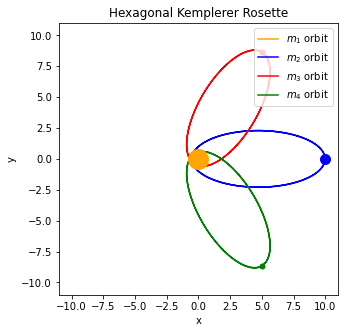

In [11]:
plt.figure(figsize = (5,5))

plt.plot(R1[:,0], R1[:,1], label = r"$m_1$ orbit", color = 'orange')
plt.plot(R2[:,0], R2[:,1], label = r"$m_2$ orbit", color = 'blue')
plt.plot(R3[:,0], R3[:,1], label = r"$m_3$ orbit", color = 'red')
plt.plot(R4[:,0], R4[:,1], label = r"$m_4$ orbit", color = 'green')

plt.plot(R1[0,0], R1[0,1], 'o', markersize = 20 , color = 'orange')
plt.plot(R2[0,0], R2[0,1], 'o', markersize = 10 , color = 'blue')
plt.plot(R3[0,0], R3[0,1], 'o', markersize = 5 , color = 'red')
plt.plot(R4[0,0], R4[0,1], 'o', markersize = 5 , color = 'green')


plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 'upper right')
plt.title("Hexagonal Kemplerer Rosette")
plt.xlim(-1.1 * R,1.1 * R)
plt.ylim(-1.1 * R,1.1 * R)

plt.savefig("3+1KlempererOrbit.jpg", dpi = 300)

Finally! I get a Klemperer Rosette. If one scrolls down to the fifth and sixth animations on Burtle's website, you should see that these orbits are basically the same!

I will now proceed to create more graphs.

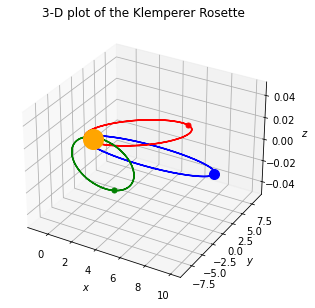

In [12]:
fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.plot3D(R1[:,0], R1[:,1], R1[:,2], color = 'orange')
ax.plot3D(R2[:,0], R2[:,1], R2[:,2], color = 'blue')
ax.plot3D(R3[:,0], R3[:,1], R3[:,2], color = 'red')
ax.plot3D(R4[:,0], R4[:,1], R4[:,2], color = 'green')

ax.plot3D(R1[0,0], R1[0,1], R1[0,2], 'o', markersize = 20 , color = 'orange')
ax.plot3D(R2[0,0], R2[0,1], R2[0,2], 'o', markersize = 10 , color = 'blue')
ax.plot3D(R3[0,0], R3[0,1], R3[0,2], 'o', markersize = 5 , color = 'red')
ax.plot3D(R4[0,0], R4[0,1], R4[0,2], 'o', markersize = 5 , color = 'green')

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")
plt.title("3-D plot of the Klemperer Rosette")

# Change to this view to see the previous plot.
#ax.view_init(45, 180)
plt.savefig("3+1KlempererOrbit3D.jpg", dpi = 300)

Text(0.5, 1.0, 'Hexagonal Kemplerer Rosette Velocities')

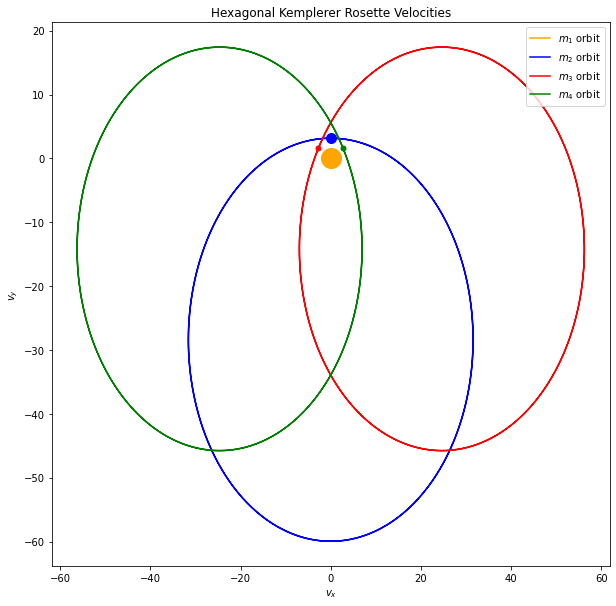

In [13]:
plt.figure(figsize = (10,10))

plt.plot(V1[:,0], V1[:,1], label = r"$m_1$ orbit", color = 'orange')
plt.plot(V2[:,0], V2[:,1], label = r"$m_2$ orbit", color = 'blue')
plt.plot(V3[:,0], V3[:,1], label = r"$m_3$ orbit", color = 'red')
plt.plot(V4[:,0], V4[:,1], label = r"$m_4$ orbit", color = 'green')

plt.plot(V1[0,0], V1[0,1], 'o', markersize = 20 , color = 'orange')
plt.plot(V2[0,0], V2[0,1], 'o', markersize = 10 , color = 'blue')
plt.plot(V3[0,0], V3[0,1], 'o', markersize = 5 , color = 'red')
plt.plot(V4[0,0], V4[0,1], 'o', markersize = 5 , color = 'green')


plt.xlabel(r"$v_x$")
plt.ylabel(r"$v_y$")
plt.legend(loc = 'upper right')
plt.title("Hexagonal Kemplerer Rosette Velocities")


Text(0.5, 0, '$v_z$')

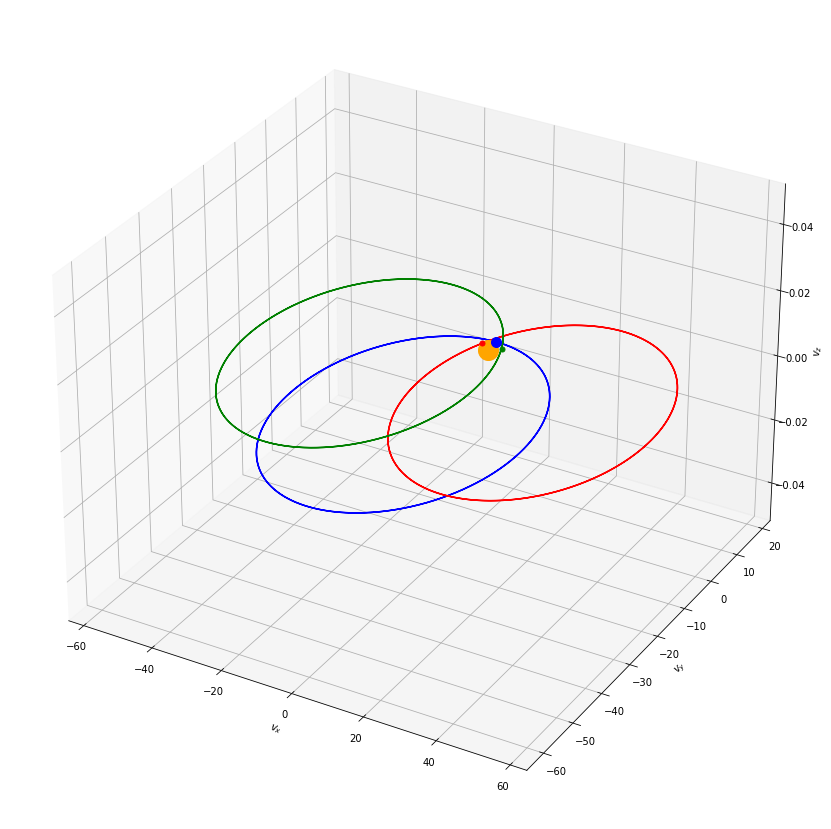

In [14]:
fig = plt.figure(figsize = (15,15))
ax = plt.axes(projection='3d')

ax.plot3D(V1[:,0], V1[:,1], V1[:,2], color = 'orange')
ax.plot3D(V2[:,0], V2[:,1], V2[:,2], color = 'blue')
ax.plot3D(V3[:,0], V3[:,1], V3[:,2], color = 'red')
ax.plot3D(V4[:,0], V4[:,1], V4[:,2], color = 'green')

ax.plot3D(V1[0,0], V1[0,1], V1[0,2], 'o', markersize = 20 , color = 'orange')
ax.plot3D(V2[0,0], V2[0,1], V2[0,2], 'o', markersize = 10 , color = 'blue')
ax.plot3D(V3[0,0], V3[0,1], V3[0,2], 'o', markersize = 5 , color = 'red')
ax.plot3D(V4[0,0], V4[0,1], V4[0,2], 'o', markersize = 5 , color = 'green')

ax.set_xlabel(r"$v_x$")
ax.set_ylabel(r"$v_y$")
ax.set_zlabel(r"$v_z$")

# Change to this view to see the previous plot.
# ax.view_init(90, 270)

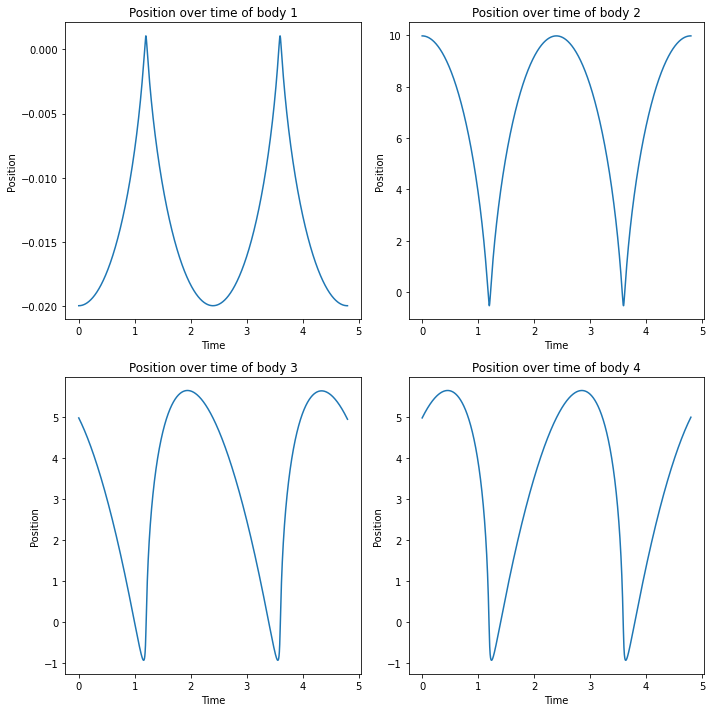

In [15]:
time = np.arange(0, N * dt, dt)

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))

axs = axs.flatten()

axs[0].plot(time[1:], R1[:,0])
axs[1].plot(time[1:], R2[:,0])
axs[2].plot(time[1:], R3[:,0])
axs[3].plot(time[1:], R4[:,0])

for i in range(4):
    axs[i].set_title(f"Position over time of body {i+1}")
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel("Position")
                        
plt.tight_layout()
plt.savefig("Klemperer3+1pos.jpg", dpi = 300)

It looks to me as if the positions of bodies 1 and 2 are mirror images vertically, as are the positions of bodies 3 and 4 but horizontally. This symmetry is an inherent part of the Klemperer Rosette, since we need symmetry for stability!

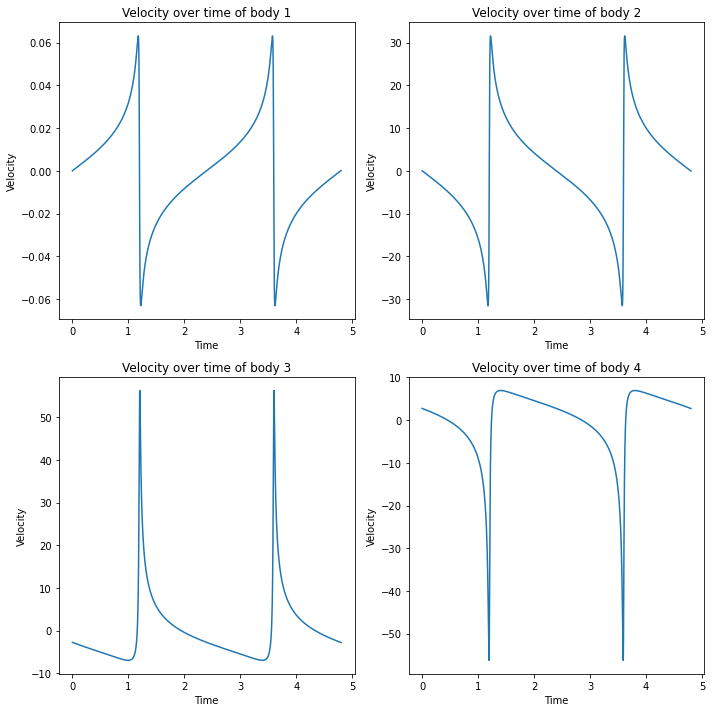

In [16]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))

axs = axs.flatten()

axs[0].plot(time[1:], V1[:,0])
axs[1].plot(time[1:], V2[:,0])
axs[2].plot(time[1:], V3[:,0])
axs[3].plot(time[1:], V4[:,0])

for i in range(4):
    axs[i].set_title(f"Velocity over time of body {i+1}")
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel("Velocity")
                        
plt.tight_layout()
plt.savefig("Klemperer3+1vel.jpg", dpi = 300)

Wow! We can see that the velocity and position plots of $m_1$ with $m_2$ and $m_3$ with $m_4$ are mirror images, cool right? Plotting the energies is boring, and we know it should be conserved so unless it's very necessary I'll do it another time.

## Spotting Errors (13/03/2023)

I realised I coded my velocity verlet incorrectly, I evaluated my F1, F2, F3, and F4 before making my new timestep positions. My new algorithm is now

```
   for i in range(N - 1):

        f1 = force(G, m1, m2, R1[i], R2[i]) + force(G, m1, m3, R1[i], R3[i]) + force(G, m1, m4, R1[i], R4[i])
        f2 = force(G, m2, m1, R2[i], R1[i]) + force(G, m2, m3, R2[i], R3[i]) + force(G, m2, m4, R2[i], R4[i])
        f3 = force(G, m3, m1, R3[i], R1[i]) + force(G, m3, m2, R3[i], R2[i]) + force(G, m3, m4, R3[i], R4[i])
        f4 = force(G, m4, m1, R4[i], R1[i]) + force(G, m4, m2, R4[i], R2[i]) + force(G, m4, m3, R4[i], R3[i])

        R1[i+1] = R1[i] + dt * V1[i] + (dt**2 * f1)/(2*m1)
        R2[i+1] = R2[i] + dt * V2[i] + (dt**2 * f2)/(2*m2)
        R3[i+1] = R3[i] + dt * V3[i] + (dt**2 * f3)/(2*m3)
        R4[i+1] = R4[i] + dt * V4[i] + (dt**2 * f4)/(2*m4)
        
        F1 = force(G, m1, m2, R1[i+1], R2[i+1]) + force(G, m1, m3, R1[i+1], R3[i+1]) + force(G, m1, m4, R1[i+1], R4[i+1])
        F2 = force(G, m2, m1, R2[i+1], R1[i+1]) + force(G, m2, m3, R2[i+1], R3[i+1]) + force(G, m2, m4, R2[i+1], R4[i+1])
        F3 = force(G, m3, m1, R3[i+1], R1[i+1]) + force(G, m3, m2, R3[i+1], R2[i+1]) + force(G, m3, m4, R3[i+1], R4[i+1])
        F4 = force(G, m4, m1, R4[i+1], R1[i+1]) + force(G, m4, m2, R4[i+1], R2[i+1]) + force(G, m4, m3, R4[i+1], R3[i+1])

        V1[i+1] = V1[i] + dt * (f1 + F1) / (2*m1)
        V2[i+1] = V2[i] + dt * (f2 + F2) / (2*m2)
        V3[i+1] = V3[i] + dt * (f3 + F3) / (2*m3)
        V4[i+1] = V4[i] + dt * (f4 + F4) / (2*m4)
        
    return R1, R2, R3, R4, V1, V2, V3, V4
```

instead of 

```
   for i in range(N - 1):

        f1 = force(G, m1, m2, R1[i], R2[i]) + force(G, m1, m3, R1[i], R3[i]) + force(G, m1, m4, R1[i], R4[i])
        f2 = force(G, m2, m1, R2[i], R1[i]) + force(G, m2, m3, R2[i], R3[i]) + force(G, m2, m4, R2[i], R4[i])
        f3 = force(G, m3, m1, R3[i], R1[i]) + force(G, m3, m2, R3[i], R2[i]) + force(G, m3, m4, R3[i], R4[i])
        f4 = force(G, m4, m1, R4[i], R1[i]) + force(G, m4, m2, R4[i], R2[i]) + force(G, m4, m3, R4[i], R3[i])
        
        F1 = force(G, m1, m2, R1[i+1], R2[i+1]) + force(G, m1, m3, R1[i+1], R3[i+1]) + force(G, m1, m4, R1[i+1], R4[i+1])
        F2 = force(G, m2, m1, R2[i+1], R1[i+1]) + force(G, m2, m3, R2[i+1], R3[i+1]) + force(G, m2, m4, R2[i+1], R4[i+1])
        F3 = force(G, m3, m1, R3[i+1], R1[i+1]) + force(G, m3, m2, R3[i+1], R2[i+1]) + force(G, m3, m4, R3[i+1], R4[i+1])
        F4 = force(G, m4, m1, R4[i+1], R1[i+1]) + force(G, m4, m2, R4[i+1], R2[i+1]) + force(G, m4, m3, R4[i+1], R3[i+1])

        R1[i+1] = R1[i] + dt * V1[i] + (dt**2 * f1)/(2*m1)
        R2[i+1] = R2[i] + dt * V2[i] + (dt**2 * f2)/(2*m2)
        R3[i+1] = R3[i] + dt * V3[i] + (dt**2 * f3)/(2*m3)
        R4[i+1] = R4[i] + dt * V4[i] + (dt**2 * f4)/(2*m4)
        

        V1[i+1] = V1[i] + dt * (f1 + F1) / (2*m1)
        V2[i+1] = V2[i] + dt * (f2 + F2) / (2*m2)
        V3[i+1] = V3[i] + dt * (f3 + F3) / (2*m3)
        V4[i+1] = V4[i] + dt * (f4 + F4) / (2*m4)
        
    return R1, R2, R3, R4, V1, V2, V3, V4
```

Unfortunately this causes my orbits to actually become a bit more unstable, but the problem with Klemperer Rosettes is that without the exact positions, the system will eventually destabilise. Perhaps this is an error with my initial positions or a problem with Python's precision.

## Spotting Errors Part 2 (13/03/2023)

With some experimenting, I found that the instability of the orbits was caused by the fact that I set $G=10$, after setting $G=1$ we now have stability.

## Calculating energies (21/03/2023)

My energies aren't being conserved I think I've done something wrong with my energy calculations.

## Discovering the issue (22/03/2023)

So I've realised that I have been double counting the potential energies, and so I now need to change how these are calculated. I also will need to change this for every other logbook.

Initially I was doing something like

```
for i in range(Nsteps):
    
    R_12 = np.linalg.norm(R1[i] - R2[i])
    R_13 = np.linalg.norm(R1[i] - R3[i])
    R_23 = np.linalg.norm(R2[i] - R3[i])
    
    KE1[i] = 0.5 * m1 * np.linalg.norm(V1[i]) **2 
    PE1[i] = - ((G*m1*m2/R_12) + (G*m1*m3/R_13))
    L1[i]  = m1 * np.cross(R1[i], V1[i])
  
    KE2[i] = 0.5 * m2 * np.linalg.norm(V2[i]) **2 
    PE2[i] = - (-(G*m2*m1/R_12) + (G*m2*m3/R_23)) # R_12 = - R_21
    L2[i]  = m2 *  np.cross(R2[i], V2[i])
    
    KE3[i] = 0.5 * m3 * np.linalg.norm(V3[i]) **2 
    PE3[i] = - (-(G*m2*m3/R_23) -(G*m1*m3/R_13))
    L3[i]  =  m3 *  np.cross(R3[i], V3[i])
```

Firstly, since all of the velocities and positions have been evaluated, I do not need to do this in a for loop, I can just use `numpy` array summing. In addition, in `PE1`, `PE2`, and `PE3`, I calculate `-G*m1*m2/R_12` twice, and so essentially I have been double counting my potential energies. 

In [17]:
# Define arrays

KE1 = np.zeros(N)
KE2 = np.zeros(N)
KE3 = np.zeros(N)
KE4 = np.zeros(N)

Total_PE = np.zeros(N)

L1 = np.zeros(N)
L2 = np.zeros(N) 
L3 = np.zeros(N)
L4 = np.zeros(N)

In [18]:
# Calculating KE

KE1 = 0.5 * m1 * (V1[:,0]**2 + V1[:,1]**2 + V1[:,2]**2) # = 1/2 mv^2 
KE2 = 0.5 * m2 * (V2[:,0]**2 + V2[:,1]**2 + V2[:,2]**2)
KE3 = 0.5 * m3 * (V3[:,0]**2 + V3[:,1]**2 + V3[:,2]**2)
KE4 = 0.5 * m4 * (V4[:,0]**2 + V4[:,1]**2 + V4[:,2]**2)


In [25]:
# Calculating PE
# PE = -GMm/r where r is the distance between the bodies
# Therefore I need to find the distance between each body

R_12 = R1 - R2
R_13 = R1 - R3
R_14 = R1 - R4

# Don't need to evaluate R_21 as |R_21| = |R_12|

R_23 = R2 - R3
R_24 = R2 - R4
R_34 = R3 - R4

# These are all the distances, these are all vectors still, but I want them to be an array of distances 

# This is now an array of distances for each timestep

R_12_mag = np.sqrt(R_12[:,0]**2 + R_12[:,1]**2 + R_12[:,2]**2)
R_13_mag = np.sqrt(R_13[:,0]**2 + R_13[:,1]**2 + R_13[:,2]**2)
R_14_mag = np.sqrt(R_14[:,0]**2 + R_14[:,1]**2 + R_14[:,2]**2)
R_23_mag = np.sqrt(R_23[:,0]**2 + R_23[:,1]**2 + R_23[:,2]**2)
R_24_mag = np.sqrt(R_24[:,0]**2 + R_24[:,1]**2 + R_24[:,2]**2)
R_34_mag = np.sqrt(R_34[:,0]**2 + R_34[:,1]**2 + R_34[:,2]**2)

PE_12 = - G * m1 * m2 / (R_12_mag)
PE_13 = - G * m1 * m3 / (R_13_mag)
PE_14 = - G * m1 * m4 / (R_14_mag)
PE_23 = - G * m2 * m3 / (R_23_mag)
PE_24 = - G * m2 * m4 / (R_24_mag)
PE_34 = - G * m3 * m4 / (R_34_mag)


Total_PE = PE_12 + PE_13 + PE_14 + PE_23 + PE_24 + PE_34

L1 = m1*np.cross(R1,V1)
L2 = m2*np.cross(R2,V2)
L3 = m3*np.cross(R3,V3)
L4 = m4*np.cross(R4,V4)

# Plot only L1[:,2] as angular momentum is only in the Z-direction 

[[0.         0.         0.12573519]
 [0.         0.         0.12573519]
 [0.         0.         0.12573519]
 ...
 [0.         0.         0.12572118]
 [0.         0.         0.12572116]
 [0.         0.         0.12572113]]


Text(0.5, 1.0, 'KE4')

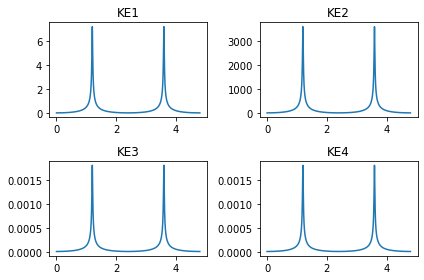

In [20]:
fig, ax = plt.subplots(2,2, tight_layout = True)

ax[0,0].plot(time[1:], KE1)
ax[0,1].plot(time[1:], KE2)
ax[1,0].plot(time[1:], KE3)
ax[1,1].plot(time[1:], KE4)
ax[0,0].set_title("KE1")
ax[0,1].set_title("KE2")
ax[1,0].set_title("KE3")
ax[1,1].set_title("KE4")

Body 2 has a huge amount of Kinetic Energy??

Text(0.5, 1.0, 'Potential Energy')

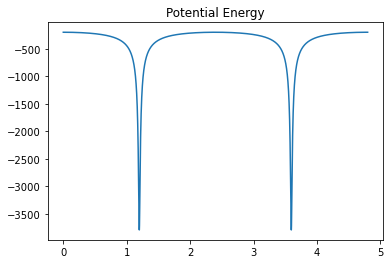

In [21]:
plt.plot(time[1:], Total_PE)
plt.title("Potential Energy")
# For some reason there's a huge spike in potential energy at timestep 129366

Text(0.5, 1.0, 'L4')

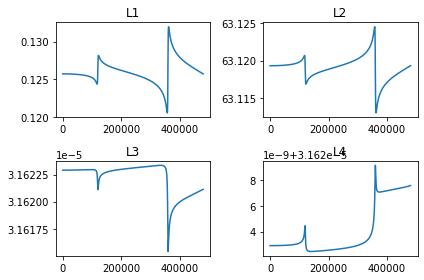

In [28]:
fig, ax = plt.subplots(2,2, tight_layout = True)

ax[0,0].plot((L1[:,2]))
ax[0,1].plot((L2[:,2]))
ax[1,0].plot((L3[:,2]))
ax[1,1].plot((L4[:,2]))

ax[0,0].set_title("L1")
ax[0,1].set_title("L2")
ax[1,0].set_title("L3")
ax[1,1].set_title("L4")

## Finding degrees of accuracy (22/03/2023)

I've also realised that I can calculate the error in the precision of my results using `np.std` to find the standard deviation. I'm quite sure that we were taught this in PHAS0007 and this was used in one or two of my assignments in PHAS0030 (I think), and it's not using another library, so I'm going to assume this is allowed.

In [29]:
print(f"Standard deviation / Error for energy is {np.std(Total_PE+KE1+KE2+KE3+KE4)}")
print(f"Error in angular momentum is {np.std(L1[:,2] + L2[:,2] + L3[:,2] + L4[:,2])}")

Standard deviation / Error for energy is 1.8107837368463012e-05
Error in angular momentum is 2.0441613401596377e-12


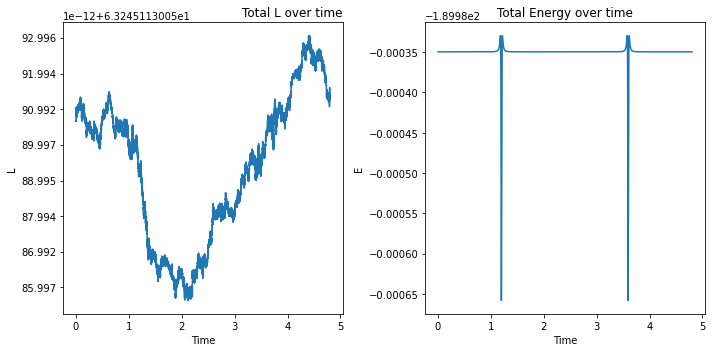

In [33]:
fig2, ax2s = plt.subplots(1,2, figsize = (10,5), tight_layout = True)
tarr = np.linspace(0, N, N)

ax2s[0].set_title("Total L over time", loc = 'right')
ax2s[0].plot(time[1:], L1[:,2] + L2[:,2] + L3[:,2] + L4[:,2])
ax2s[0].set_xlabel("Time")
ax2s[0].set_ylabel("L")

ax2s[1].set_title("Total Energy over time")
ax2s[1].plot(time[1:], Total_PE+KE1+KE2+KE3+KE4)
ax2s[1].set_xlabel("Time")
ax2s[1].set_ylabel("E")

plt.savefig("3+1KlempE.jpg", dpi = 300)